<a href="https://colab.research.google.com/github/jsilvazuniga/MyOpenCV/blob/main/Pre_trained_models_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    from tensorflow.keras.preprocessing.image import load_img
    from tensorflow.keras.preprocessing.image import img_to_array
    from tensorflow.keras.applications.imagenet_utils import decode_predictions
    print("Using Tensorflow")
except:
    from keras.preprocessing.image import load_img
    from keras.preprocessing.image import img_to_array
    from keras.applications.imagenet_utils import decode_predictions
    print("Using Keras")

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Using Tensorflow


In [2]:
try:
    from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet
except:
    from keras.applications import vgg16, inception_v3, resnet50, mobilenet
vgg_model = vgg16.VGG16(weights='imagenet')

inception_model = inception_v3.InceptionV3(weights='imagenet')

resnet_model = resnet50.ResNet50(weights='imagenet')

mobilenet_model = mobilenet.MobileNet(weights='imagenet')

17225924/17225924 [==============================] - 0s 0us/step


Download an Image

In [3]:
import urllib.request
filename = 'dog.jpg'
url_of_image = "https://upload.wikimedia.org/wikipedia/commons/9/9c/Yellow_Labrador_Retriever_2.jpg"
urllib.request.urlretrieve(url_of_image,filename)

('dog.jpg', <http.client.HTTPMessage at 0x7a86a3a7a0b0>)

**Pre-processing before feeding the image to the network**

PIL image size (224, 224)


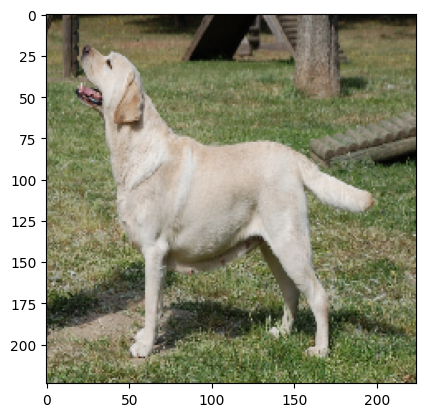

numpy array size (224, 224, 3)


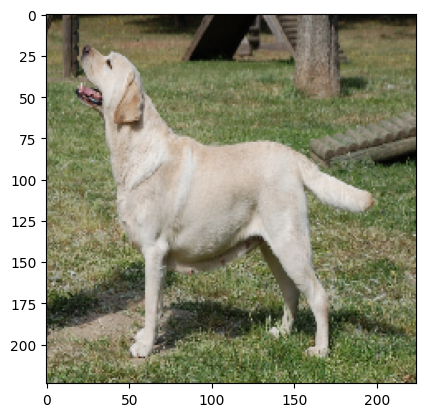

image batch size (1, 224, 224, 3)


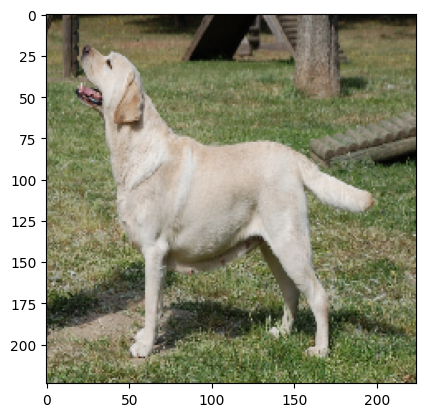

In [4]:
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
print('numpy array size',numpy_image.shape)
plt.imshow(np.uint8(numpy_image))
plt.show()

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

Predicting the Object Class

 - VGG16 Network

In [6]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)
label_vgg

35363/35363 [==============================] - 0s 0us/step


[[('n02099712', 'Labrador_retriever', 0.42112094),
  ('n02104029', 'kuvasz', 0.048872318),
  ('n02099601', 'golden_retriever', 0.04729812),
  ('n02090721', 'Irish_wolfhound', 0.03359568),
  ('n02109047', 'Great_Dane', 0.03350309)]]

- ResNet50 Network

In [7]:
# prepare the image for the ResNet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)

# convert the probabilities to class labels
# If you want to see the top 3 predictions, specify it using the top argument
label_resnet = decode_predictions(predictions, top=3)
label_resnet

1/1 [==============================] - 1s 1s/step


[[('n02099712', 'Labrador_retriever', 0.37355673),
  ('n02108422', 'bull_mastiff', 0.08689029),
  ('n02091831', 'Saluki', 0.041622426)]]

- MobileNet Network

In [8]:
# prepare the image for the MobileNet model
processed_image = mobilenet.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)

# convert the probabilities to imagenet class labels
label_mobilenet = decode_predictions(predictions)
label_mobilenet

1/1 [==============================] - 1s 626ms/step


[[('n02099712', 'Labrador_retriever', 0.91074616),
  ('n02099601', 'golden_retriever', 0.046539415),
  ('n02104029', 'kuvasz', 0.013772356),
  ('n02108422', 'bull_mastiff', 0.0049662776),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.0037109675)]]

- Inception_V3 Network

In [9]:
# load an image in PIL format
original = load_img(filename, target_size=(299, 299))

# Convert the PIL image into numpy array
numpy_image = img_to_array(original)

# reshape data in terms of batchsize
image_batch = np.expand_dims(numpy_image, axis=0)

# prepare the image for the Inception model
processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
label_inception = decode_predictions(predictions)
label_inception

1/1 [==============================] - 2s 2s/step


[[('n02099712', 'Labrador_retriever', 0.85778326),
  ('n02099601', 'golden_retriever', 0.05773027),
  ('n02108422', 'bull_mastiff', 0.005204589),
  ('n02104029', 'kuvasz', 0.0047826404),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.003064406)]]

**Comparison of Results from various Models**

In [10]:
import cv2
numpy_image = np.uint8(img_to_array(original)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))

x = 200

cv2.putText(numpy_image, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (x, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (x, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (x, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (x, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
numpy_image = cv2.resize(numpy_image, (700,700))
cv2.imwrite("{}_output.jpg".format(filename.split('/')[-1].split('.')[0]),cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))

True

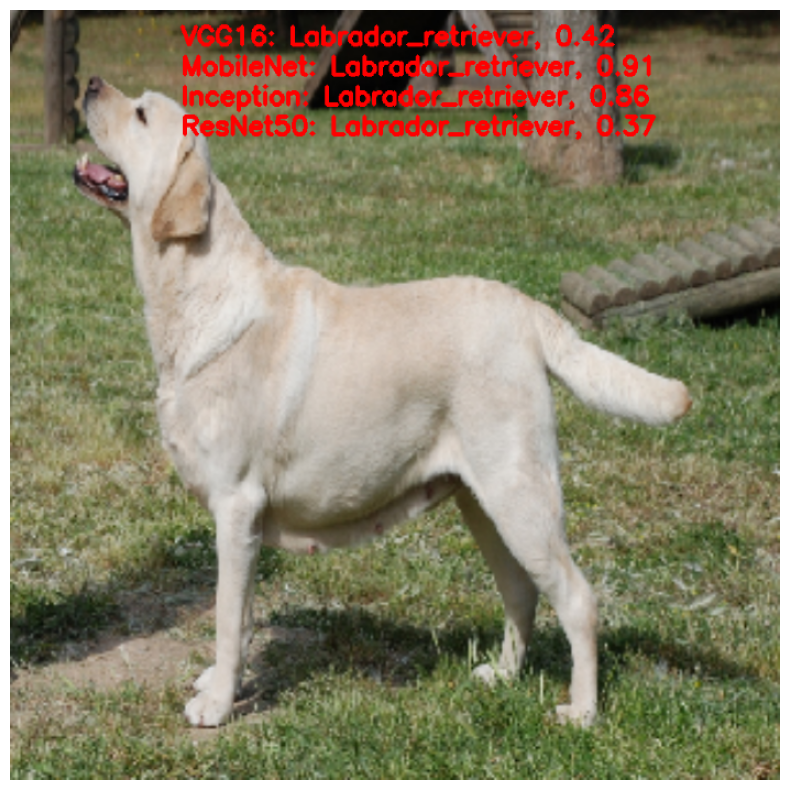

In [11]:
plt.figure(figsize=[10,10])
plt.imshow(numpy_image)
plt.axis('off');

https://keras.io/api/applications/

